# 텐서플로우 (Tensorflow)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/TensorFlowLogo.svg/1200px-TensorFlowLogo.svg.png" width="300">

- 가장 널리 쓰이는 딥러닝 프레임워크 중 하나

- 구글이 주도적으로 개발하는 플랫폼

- 파이썬, C++ API를 기본적으로 제공하고,  
  자바스크립트(JavaScript), 자바(Java), 고(Go), 스위프트(Swift) 등 다양한 프로그래밍 언어를 지원

- tf.keras를 중심으로 고수준 API 통합 (2.x 버전)

- TPU(Tensor Processing Unit) 지원
  - TPU는 GPU보다 전력을 적게 소모, 경제적
  
  - 일반적으로 32비트(float32)로 수행되는 곱셈 연산을 16비트(float16)로 낮춤

## 텐서플로우 아키텍쳐

<img src="https://developers.google.com/machine-learning/crash-course/images/TFHierarchy.svg">

<sub>출처: https://developers.google.com/machine-learning/crash-course/first-steps-with-tensorflow/toolkit</sub>

## 텐서플로우 시작하기

In [2]:
import numpy as np
import tensorflow as tf

In [3]:
print(tf.__version__)

2.3.0


### 텐서(Tensor)의 객체
- 타입(Type): `string`, `float32`, `float16`, `int32`, `int8` 등

- 형상(Shape): 0, 1, 2차원 등의 데이터 차원 

- 축(Rank): 차원의 개수

### 텐서의 차원과 연산

In [4]:
a = tf.constant(2)
print(tf.rank(a))
print(a)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


In [5]:
b = tf.constant([2, 3])
print(tf.rank(b))
print(b)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([2 3], shape=(2,), dtype=int32)


In [6]:
c = tf.constant([[2,3],[6,7]])
print(tf.rank(c))
print(c)

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(
[[2 3]
 [6 7]], shape=(2, 2), dtype=int32)


In [7]:
d = tf.constant(['Hello'])
print(tf.rank(d))
print(d)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([b'Hello'], shape=(1,), dtype=string)


### 난수 생성

In [8]:
rand = tf.random.uniform([1],0,1)
print(rand.shape)
print(rand)

(1,)
tf.Tensor([0.85056233], shape=(1,), dtype=float32)


In [12]:
rand2 = tf.random.normal([1,2],0,1)
print(rand2.shape)
print(rand2)

(1, 2)
tf.Tensor([[1.6588207 1.2384001]], shape=(1, 2), dtype=float32)


In [13]:
rand3 = tf.random.normal(shape=(3,2),mean=0,stddev=1)
print(rand3.shape)
print(rand3)

(3, 2)
tf.Tensor(
[[-1.2879415  -0.16525243]
 [ 0.9150345  -0.90235037]
 [-0.64801043  0.6825198 ]], shape=(3, 2), dtype=float32)


### 즉시 실행 모드 (Eager Mode) 지원
- 즉시 실행모드를 통해 텐서플로우를 파이썬처럼 사용할 수 있음

- 1.x 버전에서는 '그래프'를 생성하고, 초기화 한 뒤에 세션을 통해 **값을 흐르게 하는 작업**을 진행해야함


In [14]:
a = tf.constant(3)
b = tf.constant(2)

In [15]:
print(tf.add(a,b))
print(a+b)

tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)


In [16]:
print(tf.subtract(a,b))
print(a-b)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


In [17]:
print(tf.multiply(a,b))
print(a*b)

tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)


### 텐서 플로우 ↔ 넘파이
- `numpy()`
- `tf.convet_to_tensor()`

In [18]:
c = tf.add(a,b).numpy()
print(type(c))

<class 'numpy.int32'>


In [19]:
c_square = np.square(c, dtype=np.float32)
c_tensor = tf.convert_to_tensor(c_square)

print(c_tensor)
print(type(c_tensor))

tf.Tensor(25.0, shape=(), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


### 넘파이처럼 사용하기


In [20]:
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])
print(t.shape)
print(t.dtype)

(2, 3)
<dtype: 'float32'>


In [21]:
print(t[:, 1:])

tf.Tensor(
[[2. 3.]
 [5. 6.]], shape=(2, 2), dtype=float32)


In [22]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [23]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [24]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [25]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

### 타입 변환
- 텐서의 기본 dtype
  - float형 텐서: `float32`
  - int형 텐서: `int32`

- 연산시 텐서의 타입을 맞춰줘야 함
  - `float32` ~ `float32`
  - `int32` ~ `int32`
  - `flot32` ~ `int32` (x)

- 타입변환에는 `tf.cast()` 사용

In [26]:
a = tf.constant(2)
print(a)

b = tf.constant(2.)
print(b)

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(2.0, shape=(), dtype=float32)


In [28]:
#tf.constant(2.) + tf.constant(40)

In [30]:
#tf.constant(2.) + tf.constant(30., dtype=tf.float64)

In [33]:
t = tf.constant(30., dtype=tf.float64)
t2 = tf.constant(4.)

print(t2 + tf.cast(t, tf.float32))

tf.Tensor(34.0, shape=(), dtype=float32)


### AutoGraph (오토그래프)

- Tensorflow가 작업을 좀 더 빠르게 동작하게 하기 위한 방법으로 Graph로 만들어 연산을 진행

- `tf.Graph`

- 유연성이 있음

  - 모바일 애플리케이션, 임베디드 기기, 백엔드 서버와 같이 Python 인터프리터가 없는 환경에서 Tensorflow 사용 가능 

In [34]:
import timeit

### @tf.function
- 자동으로 그래프를 생성(Auto Graph)

- 그래프로 변환하여 사용 -> GPU 연산 가능

- 파이썬으로 구성된 함수를 텐서플로우의 그래프 형태로 다루고 싶을 때 사용가능


- 원본 함수가 필요하다면 `(tf.function).python_function()`

In [35]:
@tf.function
def my_function(x):
  return x**2 - 10*x + 3

print(my_function(2))
print(my_function(tf.constant(2)))

tf.Tensor(-13, shape=(), dtype=int32)
tf.Tensor(-13, shape=(), dtype=int32)


In [36]:
def my_function_(x):
  return x**2 - 10*x + 3

print(my_function_(2))
print(my_function_(tf.constant(2)))

-13
tf.Tensor(-13, shape=(), dtype=int32)


In [37]:
tf_my_func = tf.function(my_function_)

print(tf_my_func)
print(tf_my_func(2))

tf.Tensor(-13, shape=(), dtype=int32)


In [38]:
tf_my_func.python_function(2)

-13

In [39]:
def function_to_get_faster(x, y, b):
  x = tf.matmul(x, y)
  x = x + b
  return x

a_function_that_uses_a_graph = tf.function(function_to_get_faster)

x1 = tf.constant([[1., 2.]])
y1 = tf.constant([[2.],[3.]])
b1 = tf.constant(4.)

a_function_that_uses_a_graph(x1, y1, b1).numpy()

array([[12.]], dtype=float32)

In [40]:
def inner_function(x, y, b):
  x = tf.matmul(x,y)
  x = x+b
  return x

@tf.function
def outer_function(x):
  y = tf.constant([[2.],[3.]])
  b = tf.constant(4.)
  return inner_function(x,y,b)

outer_function(tf.constant([[1., 2.]])).numpy()

array([[12.]], dtype=float32)

텐서플로우가 `tf.function`으로 변환한 코드

In [42]:
print(tf.autograph.to_code(my_function.python_function))
print(tf.autograph.to_code(tf_my_func.python_function))
print(tf.autograph.to_code(outer_function.python_function))

def tf__my_function(x):
    with ag__.FunctionScope('my_function', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = (((ag__.ld(x) ** 2) - (10 * ag__.ld(x))) + 3)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)

def tf__my_function_(x):
    with ag__.FunctionScope('my_function_', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = (((ag__.ld(x) ** 2) - (10 * ag__.ld(x))) + 3)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)

def 


 속도 향상


In [44]:
class SequentialModel(tf.keras.Model):
  def __init__(self, **kwargs):
    super(SequentialModel, self).__init__(**kwargs)
    self.flatten = tf.keras.layers.Flatten(input_shape=(28,28))
    self.dense_1 = tf.keras.layers.Dense(128, activation='relu')
    self.dropout = tf.keras.layers.Dropout(.2)
    self.dense_2 = tf.keras.layers.Dense(10)

  def call(self, x):
    x = self.flatten(x)
    x = self.dense_1(x)
    x = self.dropout(x)
    x = self.dense_2(x)
    return x

input_data = tf.random.uniform([60, 28, 28])

eager_model = SequentialModel()
graph_model = tf.function(eager_model)

print('Eager time:', timeit.timeit(lambda: eager_model(input_data), number=10000))
print('Graph time:', timeit.timeit(lambda: graph_model(input_data), number=10000))

Eager time: 5.361649497999906
Graph time: 3.6942110789998424


### 변수 생성

- `tf.Variable`
- 딥러닝 모델 학습 시, 그래프 연산이 필요할 때 사용

In [45]:
X = tf.Variable(20.)

print(X)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=20.0>


### Autograd (자동 미분)

- `tf.GradientTape` API를 사용
- `tf.Variable` 같은 일부 입력에 대한 기울기 계산
  - 기본적으로 한번만 사용됨
- 변수가 포함된 연산만 기록

In [46]:
x = tf.Variable(3.)

with tf.GradientTape() as tape:
  y = x**2

In [47]:
dy_dx = tape.gradient(y, x)
dy_dx.numpy()

6.0

In [49]:
# x2 = tf.Variable(4)
# dy_dx = tape.gradient(y, x)
# dy_dx.numpy()

In [50]:
x = tf.Variable(2.)
y = tf.Variable(3.)

with tf.GradientTape() as tape:
  y_sq = y**2
  z = x**2 + tf.stop_gradient(y_sq)

grad = tape.gradient(z, {'x':x, 'y':y})

print('dz/dx:', grad['x'])

print('dz/dy:', grad['y'])

dz/dx: tf.Tensor(4.0, shape=(), dtype=float32)
dz/dy: None


In [52]:
weights = tf.Variable(tf.random.normal((3,2)), name='weights')
biases = tf.Variable(tf.zeros(2, dtype=tf.float32), name='biases')
x = [[1., 2., 3.]]

with tf.GradientTape(persistent = True) as tape:
  y = x @ weights + biases
  loss = tf.reduce_mean(y ** 2)

In [53]:
[dl_dw, dl_db] = tape.gradient(loss, [weights, biases])

In [54]:
print(weights.shape)
print(dl_dw.shape)

(3, 2)
(3, 2)


In [55]:
weights2 = tf.Variable(tf.random.normal((3,2)), name='weights')
biases2 = tf.Variable(tf.zeros(2, dtype=tf.float32), name='biases')
x2 = [[4., 5., 6.]]

[dl_dw2, dl_db2] = tape.gradient(loss, [weights2, biases2])

print(weights2.shape)
print(dl_dw.shape)

(3, 2)
(3, 2)


In [56]:
del tape

## 간단한 신경망 구조 

### 뉴런
- 입력 → 연산 → 활성화함수 → 출력

In [57]:
def sigmoid(x):
  return (1/(1+np.exp(-x)))

def Neuron(x, W, bias=0):
  z = x * W + bias
  return sigmoid(z)

In [58]:
x = tf.random.normal((1,2),0,1)
W = tf.random.normal((1,2),0,1)

print('x.shape:',x.shape)
print('W.shape:', W.shape)

print(x)
print(W)

print(Neuron(x,W))

x.shape: (1, 2)
W.shape: (1, 2)
tf.Tensor([[1.8420461 0.8640314]], shape=(1, 2), dtype=float32)
tf.Tensor([[0.24661104 1.5224384 ]], shape=(1, 2), dtype=float32)
[[0.6116537  0.78842115]]


In [59]:
x = tf.random.normal((2,1),0,1)
W = tf.random.normal((2,1),0,1)

print('x.shape:',x.shape)
print('W.shape:', W.shape)

print(x)
print(W)

print(Neuron(x,W))

x.shape: (2, 1)
W.shape: (2, 1)
tf.Tensor(
[[0.17389269]
 [1.1941262 ]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[ 0.33039954]
 [-1.9054538 ]], shape=(2, 1), dtype=float32)
[[0.5143596 ]
 [0.09318494]]


In [60]:
x = tf.random.normal((1,),0,1)
W = tf.random.normal((2,1),0,1)

print('x.shape:',x.shape)
print('W.shape:', W.shape)

print(x)
print(W)

print(Neuron(x,W))

x.shape: (1,)
W.shape: (2, 1)
tf.Tensor([0.15953659], shape=(1,), dtype=float32)
tf.Tensor(
[[-1.3285552 ]
 [-0.83565325]], shape=(2, 1), dtype=float32)
[[0.4472092 ]
 [0.46671996]]


### 퍼셉트론 학습 알고리즘 (가중치 업데이트)

## $\qquad w^{(next step)} = w + \eta \ (y - \tilde{y}) \ x$

- $w \ $: 가중치

- $\eta \ $ : 학습률

- $y \ $ : 정답 레이블

- $\tilde{y} \ $: 예측 레이블


In [61]:
x = 1
y = 0
W = tf.random.normal([1],0,1)
print(Neuron(x, W))
print('y:',y)

[0.50047207]
y: 0


In [64]:
for i in range(1000):
  output = Neuron(x, W)
  error = y - output
  W = W + x * .1 * error

  if i % 100 == 99:
    print("{}\t{}\t{}".format(i+1, error, output))

100	[-0.00483555]	[0.00483555]
200	[-0.00461347]	[0.00461347]
300	[-0.00441085]	[0.00441085]
400	[-0.00422524]	[0.00422524]
500	[-0.0040546]	[0.0040546]
600	[-0.00389719]	[0.00389719]
700	[-0.00375151]	[0.00375151]
800	[-0.00361632]	[0.00361632]
900	[-0.00349052]	[0.00349052]
1000	[-0.00337317]	[0.00337317]


In [67]:
def Neuron2(x, W, bias=0):
  z = tf.matmul(x, W, transpose_b=True) + bias
  return sigmoid(z)

In [68]:
x = tf.random.normal((1,3),0,1)
y = tf.ones(1)
W = tf.random.normal((1,3),0,1)

print(Neuron2(x, W))
print('y:',y)

[[0.36166012]]
y: tf.Tensor([1.], shape=(1,), dtype=float32)


In [69]:
for i in range(1000):
  output = Neuron2(x, W)
  error = y - output
  W = W + x * .1 * error

  if i % 100 == 99:
    print("{}\t{}\t{}".format(i+1, error, output))

100	[[0.02889723]]	[[0.9711028]]
200	[[0.01410079]]	[[0.9858992]]
300	[[0.00930345]]	[[0.99069655]]
400	[[0.00693685]]	[[0.99306315]]
500	[[0.00552845]]	[[0.99447155]]
600	[[0.00459468]]	[[0.9954053]]
700	[[0.00393045]]	[[0.99606955]]
800	[[0.0034337]]	[[0.9965663]]
900	[[0.00304842]]	[[0.9969516]]
1000	[[0.00274074]]	[[0.99725926]]


In [72]:
x = tf.random.normal((1,3),0,1)
weights = tf.random.normal((1,3),0,1)
bias = tf.zeros((1,1))

y = tf.ones((1,))

print('x\t: {}\nweights\t: {}\nbias\t: {}'.format(x, weights, bias))

x	: [[-0.09624889  0.01499321  0.59157735]]
weights	: [[-1.0511637 -1.8358537  3.2933123]]
bias	: [[0.]]


In [73]:
for i in range(1000):
  output = Neuron2(x, weights, bias=bias)
  error = y - output
  weights = weights + x * .1 * error
  bias = bias + 1 * .1 * error

  if i % 100 == 99:
    print("{}\t{}\t{}".format(i+1, error, output))

100	[[0.04740638]]	[[0.9525936]]
200	[[0.0292235]]	[[0.9707765]]
300	[[0.02105284]]	[[0.97894716]]
400	[[0.01643163]]	[[0.9835684]]
500	[[0.0134654]]	[[0.9865346]]
600	[[0.01140225]]	[[0.98859775]]
700	[[0.00988519]]	[[0.9901148]]
800	[[0.00872302]]	[[0.991277]]
900	[[0.00780463]]	[[0.99219537]]
1000	[[0.00706077]]	[[0.99293923]]


In [74]:
print('x\t: {}\nweights\t: {}\nbias\t: {}'.format(x, weights, bias))

x	: [[-0.09624889  0.01499321  0.59157735]]
weights	: [[-1.2582645 -1.8035918  4.5662284]]
bias	: [[2.1517406]]


### AND Gate

In [76]:
X = np.array([[1,1],[1,0],[0,1],[0,0]])
Y = np.array([[1],[0],[0],[0]])

W = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
  error_sum = 0

  for j in range(4):
    output = sigmoid(np.sum(X[j]*W)+b_x+b)
    error = Y[j][0] - output
    W = W + X[j] * .1 * error
    b = b + b_x * .1 * error
    error_sum += error

  if i % 200 == 0:
    print('Epoch {:4d}\tError sum{}'.format(i, error_sum))

print('\n가중치\t: {}'.format(W))
print('편향\t: {}'.format(b))

Epoch    0	Error sum[-0.0556992]
Epoch  200	Error sum[-0.10877497]
Epoch  400	Error sum[-0.06516538]
Epoch  600	Error sum[-0.04639934]
Epoch  800	Error sum[-0.03592154]
Epoch 1000	Error sum[-0.02925117]
Epoch 1200	Error sum[-0.02464119]
Epoch 1400	Error sum[-0.02127144]
Epoch 1600	Error sum[-0.01870267]
Epoch 1800	Error sum[-0.01668046]

가중치	: [6.9765415 6.979684 ]
편향	: [-11.643877]


In [77]:
for i in range(4):
  print('X: {} Y: {} Output: {}'.format(X[i], Y[i], sigmoid(np.sum(X[i] * W) + b)))

X: [1 1] Y: [1] Output: [0.9098945]
X: [1 0] Y: [0] Output: [0.00930979]
X: [0 1] Y: [0] Output: [0.00933882]
X: [0 0] Y: [0] Output: [8.772526e-06]


### OR Gate

In [78]:
X2 = np.array([[1,1],[1,0],[0,1],[0,0]])
Y2 = np.array([[1],[1],[1],[0]])
W2 = tf.random.normal([2],0,1)
b2 = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
  error_sum = 0

  for j in range(4):
    output = sigmoid(np.sum(X2[j]*W2)+b_x+b2)
    error = Y2[j][0] - output
    W2 = W2 + X2[j] * .1 * error
    b2 = b2 + b_x * .1 * error
    error_sum += error

  if i % 200 == 0:
    print('Epoch {:4d}\tError sum{}'.format(i, error_sum))

print('\n가중치\t: {}'.format(W2))
print('편향\t: {}'.format(b2))

Epoch    0	Error sum[-0.8091181]
Epoch  200	Error sum[-0.05462483]
Epoch  400	Error sum[-0.02725077]
Epoch  600	Error sum[-0.01802263]
Epoch  800	Error sum[-0.01341147]
Epoch 1000	Error sum[-0.01065808]
Epoch 1200	Error sum[-0.00883279]
Epoch 1400	Error sum[-0.00753608]
Epoch 1600	Error sum[-0.00656817]
Epoch 1800	Error sum[-0.00581954]

가중치	: [8.186547 8.184911]
편향	: [-4.627227]


In [79]:
for i in range(4):
  print('X: {} Y: {} Output: {}'.format(X2[i], Y2[i], sigmoid(np.sum(X2[i] * W2) + b2)))

X: [1 1] Y: [1] Output: [0.999992]
X: [1 0] Y: [1] Output: [0.9723293]
X: [0 1] Y: [1] Output: [0.9722853]
X: [0 0] Y: [0] Output: [0.00968709]


### XOR Gate

In [80]:
X3 = np.array([[1,1],[1,0],[0,1],[0,0]])
Y3 = np.array([[0],[1],[1],[0]])
W3 = tf.random.normal([2],0,1)
b3 = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
  error_sum = 0

  for j in range(4):
    output = sigmoid(np.sum(X3[j]*W3)+b_x+b3)
    error = Y3[j][0] - output
    W3 = W3 + X3[j] * .1 * error
    b3 = b3 + b_x * .1 * error
    error_sum += error

  if i % 200 == 0:
    print('Epoch {:4d}\tError sum{}'.format(i, error_sum))

print('\n가중치\t: {}'.format(W3))
print('편향\t: {}'.format(b3))

Epoch    0	Error sum[-0.19917965]
Epoch  200	Error sum[-0.0002532]
Epoch  400	Error sum[-1.0430813e-05]
Epoch  600	Error sum[-4.7683716e-07]
Epoch  800	Error sum[-1.013279e-06]
Epoch 1000	Error sum[-1.013279e-06]
Epoch 1200	Error sum[-1.013279e-06]
Epoch 1400	Error sum[-1.013279e-06]
Epoch 1600	Error sum[-1.013279e-06]
Epoch 1800	Error sum[-1.013279e-06]

가중치	: [ 5.1279619e-02 -2.0377338e-06]
편향	: [-0.999997]


In [81]:
for i in range(4):
  print('X: {} Y: {} Output: {}'.format(X3[i], Y3[i], sigmoid(np.sum(X3[i] * W3) + b3)))

X: [1 1] Y: [0] Output: [0.27914244]
X: [1 0] Y: [1] Output: [0.27914283]
X: [0 1] Y: [1] Output: [0.2689416]
X: [0 0] Y: [0] Output: [0.26894203]


In [89]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

np.random.seed(111)

X4 = np.array([[1,1],[1,0],[0,1],[0,0]])
Y4 = np.array([[0],[1],[1],[0]])

model = Sequential([Dense(units=2, activation='sigmoid', input_shape=(2,)),
                    Dense(units=1, activation='sigmoid')])
model.compile(optimizer=tf.keras.optimizers.SGD(lr=.1),loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [94]:
history = model.fit(X4, Y4, epochs=2000, batch_size=1, verbose=0)

In [95]:
model.predict(X4)

array([[0.33709604],
       [0.7737946 ],
       [0.77381897],
       [0.14437023]], dtype=float32)

## 시각화 사용

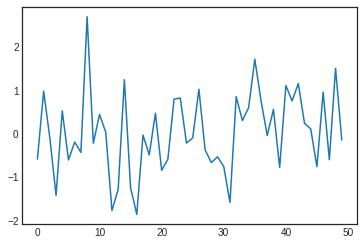

In [100]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

x = range(50)
y = tf.random.normal([50], 0,1)
plt.plot(x,y)
plt.show()

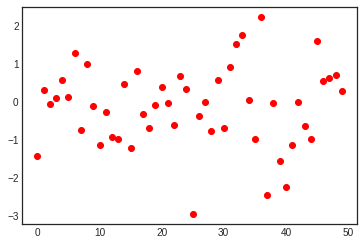

In [101]:
x = range(50)
y = tf.random.normal([50], 0,1)
plt.plot(x,y,'ro')
plt.show()

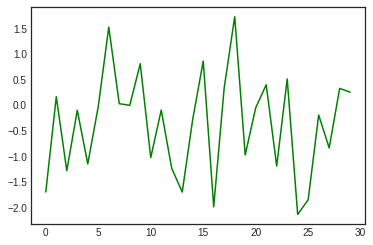

In [102]:
x = range(30)
y = tf.random.normal([30], 0,1)
plt.plot(x,y,'g-')
plt.show()

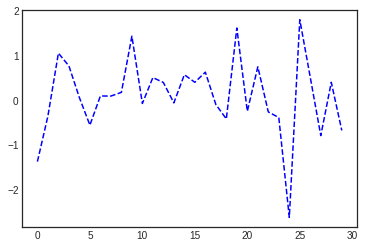

In [103]:
x = range(30)
y = tf.random.normal([30], 0,1)
plt.plot(x,y,'b--')
plt.show()

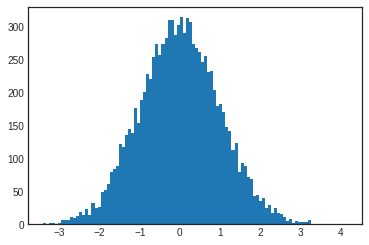

In [104]:
random_normal = tf.random.normal([10000], 0,1)
plt.hist(random_normal, bins=100)
plt.show()

### XOR Gate의 'LOSS' 시각화


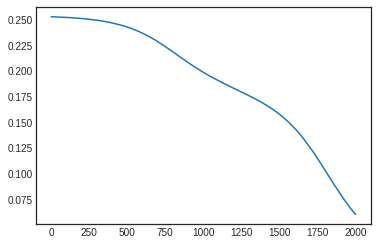

In [106]:
plt.plot(history.history['loss']);